# Loneliness, Deprivation and Population Density

## (outliers are not dropped in this file)

## Read in IMD and loneliness index data for England

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
#imd = pd.read_csv('england/imd2015eng.csv')

In [57]:
loneliness = pd.read_csv('england/final_data.csv')

## For the record, I dont think the scaling is necessary as they are already scaled.

In [58]:
z_scores = ['depression_zscore', 'alzheimers_zscore',
       'blood pressure_zscore', 'hypertension_zscore', 'diabeties_zscore',
       'cardiovascular disease_zscore', 'insomnia_zscore', 'addiction_zscore',
       'social anxiety_zscore']

In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_zscores = scaler.fit_transform(loneliness[z_scores])
lonely_scaled_zscores = pd.DataFrame(data=scaled_zscores, columns=z_scores)


In [101]:
(lonely_scaled_zscores.shape[0]) ** (1/2)

84.07139822793481

## does it make more sense to keep the outliers and use a more outlier resistant clustering aka gaussian?

In [84]:
Q1 = lonely_scaled_zscores.quantile(q=0.25)
Q3 = lonely_scaled_zscores.quantile(q=0.75)
IQR = Q3-Q1
df = lonely_scaled_zscores[~((lonely_scaled_zscores < (Q1 - 1.5 * IQR)) |(lonely_scaled_zscores > (Q3 + 1.5 * IQR))).any(axis=1)]
#df.to_csv('england/data_without_outliers.csv')

In [85]:
df


,depression_zscore,alzheimers_zscore,blood pressure_zscore,hypertension_zscore,diabeties_zscore,cardiovascular disease_zscore,insomnia_zscore,addiction_zscore,social anxiety_zscore
0,-0.496582,-1.115815,-0.213065,-0.168966,-0.645544,-0.610305,-0.564325,-0.074784,-0.201200
1,-0.130197,-1.337965,0.401932,0.375243,-0.082916,0.017225,-0.556182,-0.101109,-0.316369
2,-0.442146,-1.199162,0.854180,0.906842,0.122999,0.942341,-1.074041,-0.101109,-0.257711
3,-0.075394,-1.134196,-0.420198,-0.439388,-0.448031,-0.688742,-0.817251,-0.101109,-0.059843
4,0.088674,-1.028607,-0.348116,-0.295530,-0.237043,-0.926153,0.230306,-0.063257,-0.535959
...,...,...,...,...,...,...,...,...,...
7062,-0.239812,-0.021415,0.121646,0.095165,-1.010884,-0.335236,-0.883740,-0.101109,-0.548395
7063,-0.695242,0.174473,1.047171,1.019236,-0.649543,-0.702050,-1.111042,-0.101109,0.893295
7064,-0.396107,-0.375873,1.007923,0.956165,-0.181028,0.993689,-1.178334,-0.101109,-0.460816
7065,0.436598,-0.206891,-1.010716,-1.026410,-0.409325,-0.639174,-1.051506,-0.094161,-0.808795


In [88]:
from sklearn.cluster import KMeans
kmeans = KMeans(
    init="random",
    n_clusters=10,
    n_init=10,
    max_iter=300,
    random_state=42
)

In [89]:
kmeans.fit(df)

KMeans(init='random', n_clusters=10, random_state=42)

## Perform Dimensionality Reduction using TSNE

In [90]:
from sklearn.manifold import TSNE

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 4466 samples in 0.004s...
[t-SNE] Computed neighbors for 4466 samples in 0.315s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4466
[t-SNE] Computed conditional probabilities for sample 2000 / 4466
[t-SNE] Computed conditional probabilities for sample 3000 / 4466
[t-SNE] Computed conditional probabilities for sample 4000 / 4466
[t-SNE] Computed conditional probabilities for sample 4466 / 4466
[t-SNE] Mean sigma: 0.472361
[t-SNE] KL divergence after 250 iterations with early exaggeration: 84.269531
[t-SNE] KL divergence after 5000 iterations: 1.787516


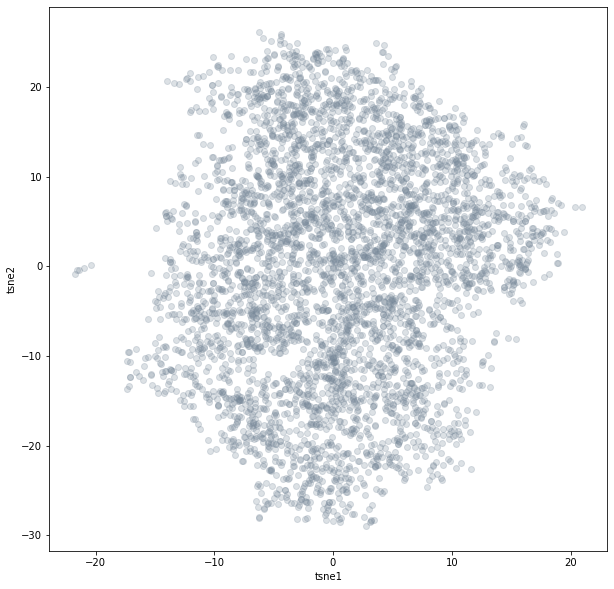

In [94]:
tsne = TSNE(n_components=3, verbose=1, perplexity=30, n_iter=5000, learning_rate=200)
tsne_scale_results = tsne.fit_transform(df)
tsne_df_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2', 'tsne3'])
plt.figure(figsize = (10,10))
plt.scatter(tsne_df_scale.iloc[:,0],tsne_df_scale.iloc[:,1],alpha=0.25, facecolor='lightslategray')
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 4466 samples in 0.003s...
[t-SNE] Computed neighbors for 4466 samples in 0.195s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4466
[t-SNE] Computed conditional probabilities for sample 2000 / 4466
[t-SNE] Computed conditional probabilities for sample 3000 / 4466
[t-SNE] Computed conditional probabilities for sample 4000 / 4466
[t-SNE] Computed conditional probabilities for sample 4466 / 4466
[t-SNE] Mean sigma: 0.368710
[t-SNE] KL divergence after 250 iterations with early exaggeration: 93.957558
[t-SNE] KL divergence after 5000 iterations: 1.699439


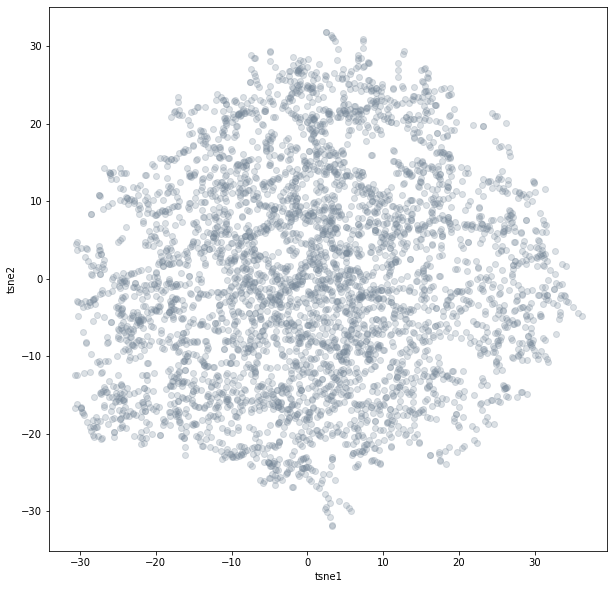

In [95]:
tsne = TSNE(n_components=3, verbose=1, perplexity=10, n_iter=5000, learning_rate=200)
tsne_scale_results = tsne.fit_transform(df)
tsne_df_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2', 'tsne3'])
plt.figure(figsize = (10,10))
plt.scatter(tsne_df_scale.iloc[:,0],tsne_df_scale.iloc[:,1],alpha=0.25, facecolor='lightslategray')
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 4466 samples in 0.004s...
[t-SNE] Computed neighbors for 4466 samples in 0.391s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4466
[t-SNE] Computed conditional probabilities for sample 2000 / 4466
[t-SNE] Computed conditional probabilities for sample 3000 / 4466
[t-SNE] Computed conditional probabilities for sample 4000 / 4466
[t-SNE] Computed conditional probabilities for sample 4466 / 4466
[t-SNE] Mean sigma: 0.523167
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.998398
[t-SNE] KL divergence after 5000 iterations: 1.683442


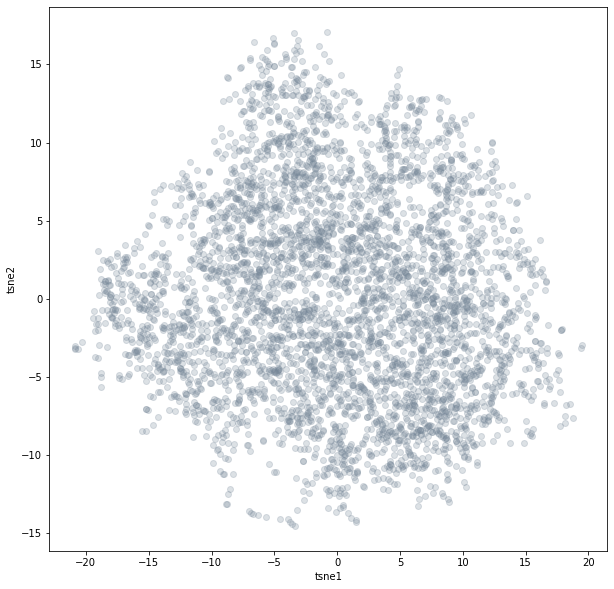

In [102]:
tsne = TSNE(n_components=3, verbose=1, perplexity=50, n_iter=5000, learning_rate=200)
tsne_scale_results = tsne.fit_transform(df)
tsne_df_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2', 'tsne3'])
plt.figure(figsize = (10,10))
plt.scatter(tsne_df_scale.iloc[:,0],tsne_df_scale.iloc[:,1],alpha=0.25, facecolor='lightslategray')
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()

Text(0, 0.5, 'Inertia')

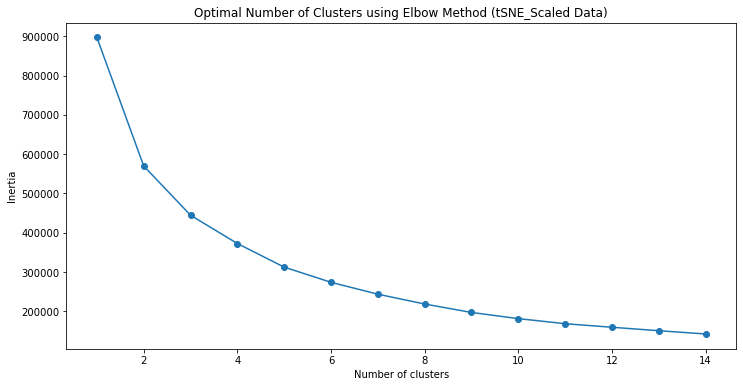

In [103]:
sse = []
k_list = range(1, 15)
for k in k_list:
    km = KMeans(n_clusters=k)
    km.fit(tsne_df_scale)
    sse.append([k, km.inertia_])
    
tsne_results_scale = pd.DataFrame({'Cluster': range(1,15), 'SSE': sse})
plt.figure(figsize=(12,6))
plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1], marker='o')
plt.title('Optimal Number of Clusters using Elbow Method (tSNE_Scaled Data)')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [131]:
clusters_tsne_scale

,tsne1,tsne2,tsne3,tsne_clusters
0,-2.735752,-10.398786,-9.163084,1
1,-8.658005,0.581475,-0.741242,3
2,-11.662201,-1.575714,8.855589,3
3,-3.154052,-8.856754,-7.910079,1
4,-2.773897,-2.183671,-11.984743,1
...,...,...,...,...
4461,-0.315353,-8.557439,3.462824,2
4462,-2.135346,8.974377,6.756460,0
4463,-4.792060,-2.482995,12.875877,0
4464,5.246134,-10.732386,-7.677812,1


In [126]:
clu

array([1, 3, 3, ..., 0, 1, 2], dtype=int32)

In [107]:
from sklearn.metrics import silhouette_score
kmeans_tsne = KMeans(n_clusters=4, n_init=100, max_iter=400, init='k-means++', random_state=42)
kmeans_tsne.fit(tsne_df_scale)
print('KMeans tSNE Scaled Silhouette Score: {}'.format(silhouette_score(tsne_df_scale, kmeans_tsne.labels_, metric='euclidean')))

KMeans tSNE Scaled Silhouette Score: 0.27227139472961426


In [109]:
labels_tsne_scale = kmeans_tsne.labels_
clusters_tsne_scale = pd.concat([tsne_df_scale, pd.DataFrame({'tsne_clusters':labels_tsne_scale})], axis=1)

/Users/xf20939/opt/anaconda3/envs/generalml/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


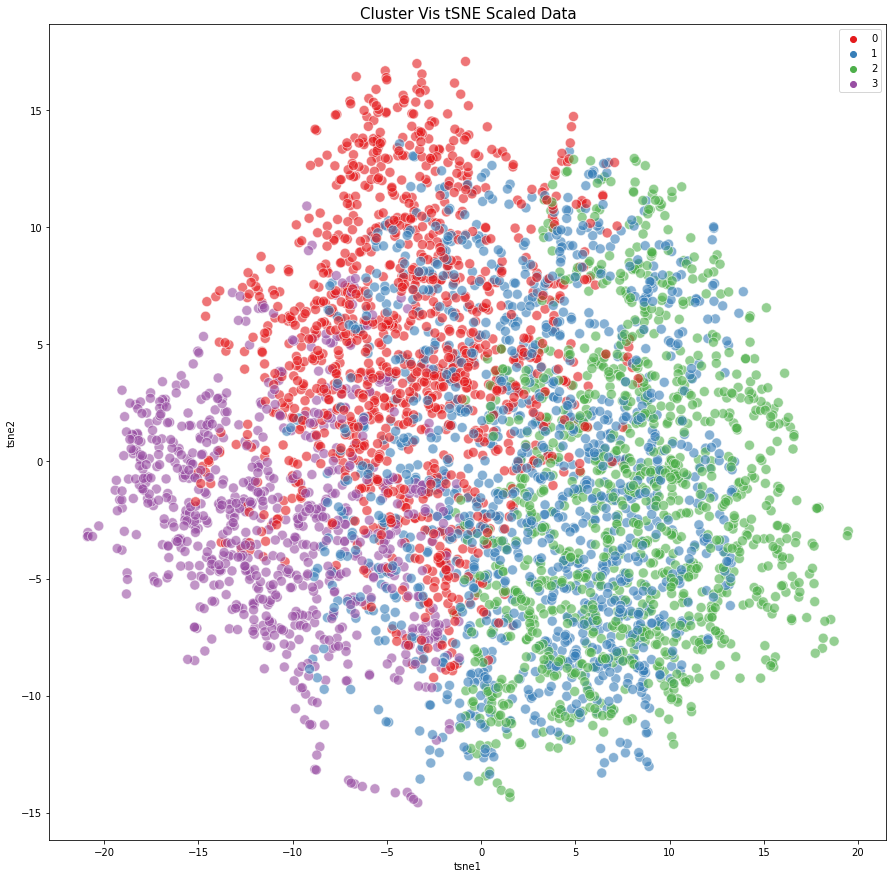

In [110]:
plt.figure(figsize = (15,15))
sns.scatterplot(clusters_tsne_scale.iloc[:,0],clusters_tsne_scale.iloc[:,1],hue=labels_tsne_scale, palette='Set1', s=100, alpha=0.6).set_title('Cluster Vis tSNE Scaled Data', fontsize=15)
plt.legend()
plt.show() 

In [146]:
colours = {0:'red', 1:'green', 2:'blue', 3:'yellow'}

In [147]:
clusters_tsne_scale['tsne_clusters'].map(colours)

0        green
1       yellow
2       yellow
3        green
4        green
         ...  
4461      blue
4462       red
4463       red
4464     green
4465      blue
Name: tsne_clusters, Length: 4466, dtype: object

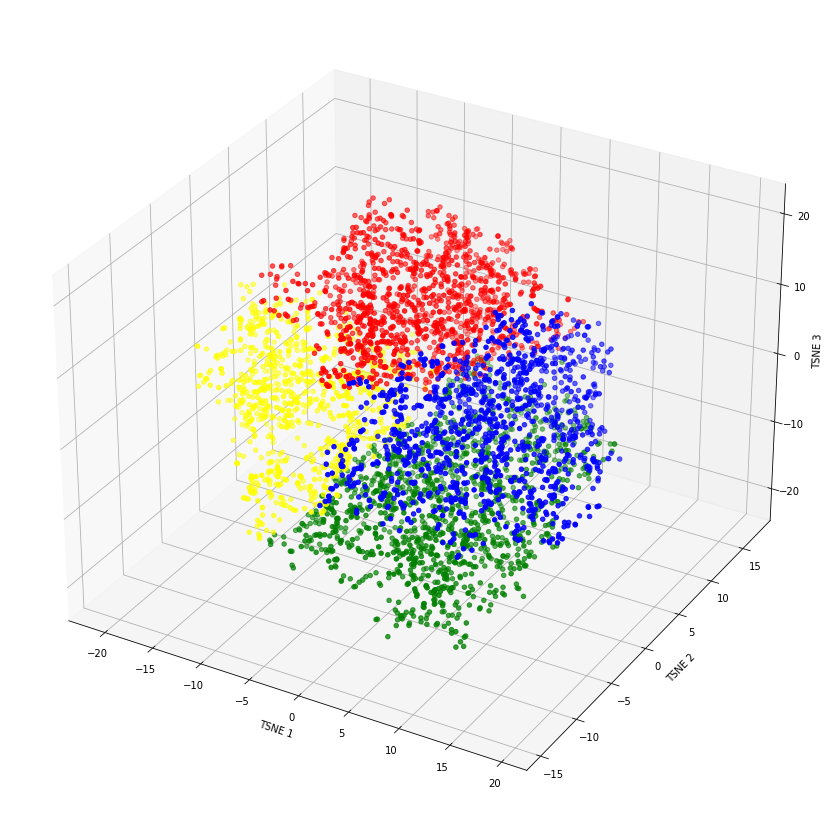

In [148]:
fig = plt.figure(figsize=[15, 15])
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('TSNE 1')
ax.set_ylabel('TSNE 2')
ax.set_zlabel('TSNE 3')
ax.scatter(clusters_tsne_scale.tsne1, clusters_tsne_scale.tsne2, clusters_tsne_scale.tsne3, c=clusters_tsne_scale['tsne_clusters'].map(colours), marker='o')




In [149]:
# now separate out the clusters and get find averages of things for each cluster, compare so you can characterize each cluster

In [47]:


# cleaning, outliers, normalization.

#plot ranges of features - histogram for each feature alone. make sure not weird outliers...
#could use RF to assign new values instead of dropping outliers. -- could use that to correct loneliness score. Josh Starmer vid on dealing with this - statquest.



#seaborn - 2d matrix, correllation for loneliness.
#correlated features with clustring is an issue

#look at density of clusters/ intrinsic/ extrinsic.

#again look at loneliness over a number of years. imagine that you look at 2005 and 2006. reidentify the clusters, see the shift in the mean. 


#compress N-feature space into a 2d space. use TSNE.

#split into groups and cluster for each.


,Unnamed: 0,pcstrip,Year,NUMBER_OF_PATIENTS,SHA,PCT,oseast1m,osnrth1m,lsoa11,msoa11,...,alzheimers_zscore,blood pressure_zscore,hypertension_zscore,diabeties_zscore,cardiovascular disease_zscore,insomnia_zscore,addiction_zscore,social anxiety_zscore,loneliness_zscore,loneills
0,0,AL100BS,2015,9513.00,Q58,06K,522443.0,208996.0,E01023927,E02004990,...,-1.115736,-0.213050,-0.168954,-0.645499,-0.610262,-0.564285,-0.074779,-0.201186,-1.022917,-2.621486
1,1,AL100NL,2015,12392.25,Q58,06K,522442.0,208808.0,E01023920,E02004991,...,-1.337870,0.401903,0.375216,-0.082910,0.017223,-0.556142,-0.101102,-0.316347,-0.017028,-2.066433
2,2,AL108HP,2015,9585.75,Q58,06K,522445.0,208444.0,E01023922,E02004991,...,-1.199077,0.854120,0.906778,0.122991,0.942274,-1.073965,-0.101102,-0.257693,0.604950,-2.167174
3,3,AL13HD,2015,19392.00,Q58,06N,515081.0,207765.0,E01023676,E02004934,...,-1.134115,-0.420169,-0.439357,-0.448000,-0.688693,-0.817193,-0.101102,-0.059839,-0.990541,-2.626996
4,4,AL13JB,2015,18274.00,Q58,06N,514829.0,207213.0,E01023727,E02004935,...,-1.028534,-0.348092,-0.295509,-0.237027,-0.926088,0.230290,-0.063253,-0.535921,-0.704620,-1.604260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7063,7063,YO71LU,2015,8236.50,Q50,03D,442965.0,481974.0,E01027630,E02005757,...,0.174461,1.047097,1.019164,-0.649497,-0.702000,-1.110963,-0.101102,0.893232,-0.391322,0.179598
7064,7064,YO73RP,2015,2925.25,Q50,03D,440259.0,475953.0,E01027635,E02005758,...,-0.375846,1.007852,0.956097,-0.181015,0.993619,-1.178251,-0.101102,-0.460783,0.633195,-1.555965
7065,7065,YO84BL,2015,11071.75,Q50,03Q,461055.0,432478.0,E01027908,E02005813,...,-0.206876,-1.010645,-1.026337,-0.409296,-0.639128,-1.051432,-0.094154,-0.808738,-1.036607,-2.750970
7066,7066,YO84QH,2015,16039.50,Q50,03Q,461500.0,432020.0,E01027909,E02005813,...,0.259496,-0.732146,-0.761066,-0.843255,-0.311799,-0.921579,-0.017489,-0.591003,-0.586766,-1.266272


In [44]:
lone 

# cleaning, outliers, normalization.

#plot ranges of features - histogram for each feature alone. make sure not weird outliers...
#could use RF to assign new values instead of dropping outliers. -- could use that to correct loneliness score. Josh Starmer vid on dealing with this - statquest.



#seaborn - 2d matrix, correllation for loneliness.
#correlated features with clustring is an issue

#look at density of clusters/ intrinsic/ extrinsic.

#again look at loneliness over a number of years. imagine that you look at 2005 and 2006. reidentify the clusters, see the shift in the mean. 


#compress N-feature space into a 2d space. use TSNE.

#split into groups and cluster for each.


,Unnamed: 0,pcstrip,Year,NUMBER_OF_PATIENTS,SHA,PCT,oseast1m,osnrth1m,lsoa11,msoa11,...,alzheimers_zscore,blood pressure_zscore,hypertension_zscore,diabeties_zscore,cardiovascular disease_zscore,insomnia_zscore,addiction_zscore,social anxiety_zscore,loneliness_zscore,loneills
0,0,AL100BS,2015,9513.00,Q58,06K,522443.0,208996.0,E01023927,E02004990,...,-1.115736,-0.213050,-0.168954,-0.645499,-0.610262,-0.564285,-0.074779,-0.201186,-1.022917,-2.621486
1,1,AL100NL,2015,12392.25,Q58,06K,522442.0,208808.0,E01023920,E02004991,...,-1.337870,0.401903,0.375216,-0.082910,0.017223,-0.556142,-0.101102,-0.316347,-0.017028,-2.066433
2,2,AL108HP,2015,9585.75,Q58,06K,522445.0,208444.0,E01023922,E02004991,...,-1.199077,0.854120,0.906778,0.122991,0.942274,-1.073965,-0.101102,-0.257693,0.604950,-2.167174
3,3,AL13HD,2015,19392.00,Q58,06N,515081.0,207765.0,E01023676,E02004934,...,-1.134115,-0.420169,-0.439357,-0.448000,-0.688693,-0.817193,-0.101102,-0.059839,-0.990541,-2.626996
4,4,AL13JB,2015,18274.00,Q58,06N,514829.0,207213.0,E01023727,E02004935,...,-1.028534,-0.348092,-0.295509,-0.237027,-0.926088,0.230290,-0.063253,-0.535921,-0.704620,-1.604260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7063,7063,YO71LU,2015,8236.50,Q50,03D,442965.0,481974.0,E01027630,E02005757,...,0.174461,1.047097,1.019164,-0.649497,-0.702000,-1.110963,-0.101102,0.893232,-0.391322,0.179598
7064,7064,YO73RP,2015,2925.25,Q50,03D,440259.0,475953.0,E01027635,E02005758,...,-0.375846,1.007852,0.956097,-0.181015,0.993619,-1.178251,-0.101102,-0.460783,0.633195,-1.555965
7065,7065,YO84BL,2015,11071.75,Q50,03Q,461055.0,432478.0,E01027908,E02005813,...,-0.206876,-1.010645,-1.026337,-0.409296,-0.639128,-1.051432,-0.094154,-0.808738,-1.036607,-2.750970
7066,7066,YO84QH,2015,16039.50,Q50,03Q,461500.0,432020.0,E01027909,E02005813,...,0.259496,-0.732146,-0.761066,-0.843255,-0.311799,-0.921579,-0.017489,-0.591003,-0.586766,-1.266272


IMD data is a single snapshot for each LSOA. Loneliness in theory has entries for each year for each postcode but in practice is limited to a single year. Will need to produce an aggregate view for each LSOA to fuse with the IMD data

In [4]:
agg_cols = {'loneills': 'mean', 'addiction_zscore' : 'mean',  }
loneliness_per_lsoa11_2 = loneliness.groupby(['lsoa11', 'Year'], as_index=False).agg(agg_cols)

loneliness_imd2 = pd.merge(loneliness_per_lsoa11_2, imd, how='left', left_on=['lsoa11'], right_on=['LSOA code (2011)'])

In [5]:
loneliness_imd2

,lsoa11,Year,loneills,addiction_zscore,LSOA code (2011),LSOA name (2011),Local Authority District code (2013),Local Authority District name (2013),Index of Multiple Deprivation (IMD) Score,Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived),...,Indoors Sub-domain Rank (where 1 is most deprived),Indoors Sub-domain Decile (where 1 is most deprived 10% of LSOAs),Outdoors Sub-domain Score,Outdoors Sub-domain Rank (where 1 is most deprived),Outdoors Sub-domain Decile (where 1 is most deprived 10% of LSOAs),Total population: mid 2012 (excluding prisoners),Dependent Children aged 0-15: mid 2012 (excluding prisoners),Population aged 16-59: mid 2012 (excluding prisoners),Older population aged 60 and over: mid 2012 (excluding prisoners),Working age population 18-59/64: for use with Employment Deprivation Domain (excluding prisoners)
0,E01000007,2015,-3.032939,-0.001290,E01000007,Barking and Dagenham 015A,E09000002,Barking and Dagenham,42.513,3778.0,...,11759.0,4.0,1.279,2348.0,1.0,1478.0,372.0,1003.0,103.0,979.50
1,E01000009,2015,-6.786468,-0.101102,E01000009,Barking and Dagenham 016B,E09000002,Barking and Dagenham,33.412,6750.0,...,9427.0,3.0,1.027,3794.0,2.0,1839.0,340.0,1257.0,242.0,1233.50
2,E01000010,2015,-1.346273,-0.101102,E01000010,Barking and Dagenham 015C,E09000002,Barking and Dagenham,30.914,7796.0,...,5411.0,2.0,0.658,6946.0,3.0,3120.0,741.0,2241.0,138.0,2226.25
3,E01000012,2015,-2.063601,-0.101102,E01000012,Barking and Dagenham 015D,E09000002,Barking and Dagenham,36.910,5475.0,...,4492.0,2.0,0.992,4034.0,2.0,2007.0,619.0,1282.0,106.0,1248.50
4,E01000017,2015,-0.972582,-0.101102,E01000017,Barking and Dagenham 009C,E09000002,Barking and Dagenham,40.563,4357.0,...,11830.0,4.0,0.525,8498.0,3.0,1622.0,409.0,991.0,222.0,957.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6266,E01033758,2015,-0.932807,-0.101102,E01033758,Liverpool 060B,E08000012,Liverpool,35.068,6121.0,...,2509.0,1.0,1.704,1003.0,1.0,1997.0,61.0,1868.0,68.0,1904.25
6267,E01033759,2015,-2.025628,-0.101102,E01033759,Liverpool 010F,E08000012,Liverpool,54.124,1582.0,...,5987.0,2.0,0.834,5284.0,2.0,1195.0,283.0,702.0,210.0,716.25
6268,E01033762,2015,1.970892,-0.101102,E01033762,Liverpool 060E,E08000012,Liverpool,26.541,9976.0,...,6832.0,3.0,1.310,2210.0,1.0,1795.0,50.0,1669.0,76.0,1678.25
6269,E01033764,2015,0.166426,0.553710,E01033764,Liverpool 022E,E08000012,Liverpool,76.865,72.0,...,25196.0,8.0,1.405,1835.0,1.0,2158.0,339.0,1249.0,570.0,1303.00


## rename columns


In [6]:
# here is where I rename those columns
big_dict = {'Outdoors Sub-domain Score':"outdoor_score",
                               'Year': 'year',
                               'LSOA code (2011)': 'lsoa_code',
                               'LSOA name (2011)': 'lsoa_name',
                               'Local Authority District code (2013)': 'district_code',
                               'Local Authority District name (2013)': 'district_name',
                               'Index of Multiple Deprivation (IMD) Score': 'imd_score',
                               'Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived)': 'imd_rank',
                               'Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs)': 'imd_decile',
                               'Income Score (rate)': 'income_score',
                            'Income Rank (where 1 is most deprived)': 'income_rank',
       'Income Decile (where 1 is most deprived 10% of LSOAs)': 'income_decile',
       'Employment Score (rate)': 'employment_rate', 
                               'Employment Rank (where 1 is most deprived)': 'employment_score',
       'Employment Decile (where 1 is most deprived 10% of LSOAs)': 'employment_decile',
       'Education, Skills and Training Score': 'education_score',
       'Education, Skills and Training Rank (where 1 is most deprived)': 'education_rank',
       'Education, Skills and Training Decile (where 1 is most deprived 10% of LSOAs)': 'education_decile',
       'Health Deprivation and Disability Score': 'health_score',
       'Health Deprivation and Disability Rank (where 1 is most deprived)': 'health_rank',
       'Health Deprivation and Disability Decile (where 1 is most deprived 10% of LSOAs)': 'health_decile',
       'Crime Score': 'crime_score',
                               'Crime Rank (where 1 is most deprived)': 'crime_rank',
       'Crime Decile (where 1 is most deprived 10% of LSOAs)': 'crime_decile',
       'Barriers to Housing and Services Score': 'housing_score',
       'Barriers to Housing and Services Rank (where 1 is most deprived)': 'housing_rank',
       'Barriers to Housing and Services Decile (where 1 is most deprived 10% of LSOAs)': 'housing_decile',
       'Living Environment Score': 'living_score',
       'Living Environment Rank (where 1 is most deprived)': 'living_rank',
       'Living Environment Decile (where 1 is most deprived 10% of LSOAs)': 'living_decile',
       'Income Deprivation Affecting Children Index (IDACI) Score (rate)':'poor_children_score',
       'Income Deprivation Affecting Children Index (IDACI) Rank (where 1 is most deprived)': 'poor_children_rank',
       'Income Deprivation Affecting Children Index (IDACI) Decile (where 1 is most deprived 10% of LSOAs)': 'poor_children_decile',
       'Income Deprivation Affecting Older People (IDAOPI) Score (rate)': 'poor_older_score',
       'Income Deprivation Affecting Older People (IDAOPI) Rank (where 1 is most deprived)': 'poor_older_rank',
       'Income Deprivation Affecting Older People (IDAOPI) Decile (where 1 is most deprived 10% of LSOAs)': 'poor_older_decile',
       'Children and Young People Sub-domain Score': 'young_sub_score',
       'Children and Young People Sub-domain Rank (where 1 is most deprived)': 'young_sub_rank',
       'Children and Young People Sub-domain Decile (where 1 is most deprived 10% of LSOAs)':'young_sub_decile',
       'Adult Skills Sub-domain Score': 'adult_skills_sub_score',
       'Adult Skills Sub-domain Rank (where 1 is most deprived)': 'adult_skills_sub_rank',
       'Adult Skills Sub-domain Decile (where 1 is most deprived 10% of LSOAs)': 'adult_skills_sub_decile',
       'Geographical Barriers Sub-domain Score': 'geog_barriers_sub_score',
       'Geographical Barriers Sub-domain Rank (where 1 is most deprived)': 'geog_barriers_sub_rank',
       'Geographical Barriers Sub-domain Decile (where 1 is most deprived 10% of LSOAs)': 'geog_barriers_sub_decile',
       'Wider Barriers Sub-domain Score': 'wider_barriers_sub_score',
       'Wider Barriers Sub-domain Rank (where 1 is most deprived)': 'wider_barriers_sub_rank',
       'Wider Barriers Sub-domain Decile (where 1 is most deprived 10% of LSOAs)': 'wider_barriers_sub_decile',
       'Indoors Sub-domain Score': 'indoor_sub_score',
       'Indoors Sub-domain Rank (where 1 is most deprived)': 'indoor_sub_rank',
       'Indoors Sub-domain Decile (where 1 is most deprived 10% of LSOAs)': 'indoor_sub_decile',
       'Outdoors Sub-domain Score': 'outdoor_sub_score',
       'Outdoors Sub-domain Rank (where 1 is most deprived)': 'outdoor_sub_rank',
       'Outdoors Sub-domain Decile (where 1 is most deprived 10% of LSOAs)': 'outdoor_sub_decile',
       'Total population: mid 2012 (excluding prisoners)':'total_population',
       'Dependent Children aged 0-15: mid 2012 (excluding prisoners)':'aged_under_15_population',
       'Population aged 16-59: mid 2012 (excluding prisoners)': 'aged_16-59_population',
       'Older population aged 60 and over: mid 2012 (excluding prisoners)': 'aged_over_60_population',
       'Working age population 18-59/64: for use with Employment Deprivation Domain (excluding prisoners) ': 'working_age_population'}



#loneliness_imd = loneliness_imd.rename(columns=big_dict)

loneliness_imd2 = loneliness_imd2.rename(columns=big_dict)

## introduce population density data


In [8]:
pop_density = pd.read_csv('england/Population_Density.csv')
pop_density = pop_density.rename(columns={'Code':'lsoa11'})

In [17]:
loneliness_imd2 = loneliness_imd2.drop(columns='lsoa_code') #this data is duplicate

,lsoa11,year,loneills,addiction_zscore,lsoa_name,district_code,district_name,imd_score,imd_rank,imd_decile,...,indoor_sub_rank,indoor_sub_decile,outdoor_sub_score,outdoor_sub_rank,outdoor_sub_decile,total_population,aged_under_15_population,aged_16-59_population,aged_over_60_population,working_age_population
0,E01000007,2015,-3.032939,-0.001290,Barking and Dagenham 015A,E09000002,Barking and Dagenham,42.513,3778.0,2.0,...,11759.0,4.0,1.279,2348.0,1.0,1478.0,372.0,1003.0,103.0,979.50
1,E01000009,2015,-6.786468,-0.101102,Barking and Dagenham 016B,E09000002,Barking and Dagenham,33.412,6750.0,3.0,...,9427.0,3.0,1.027,3794.0,2.0,1839.0,340.0,1257.0,242.0,1233.50
2,E01000010,2015,-1.346273,-0.101102,Barking and Dagenham 015C,E09000002,Barking and Dagenham,30.914,7796.0,3.0,...,5411.0,2.0,0.658,6946.0,3.0,3120.0,741.0,2241.0,138.0,2226.25
3,E01000012,2015,-2.063601,-0.101102,Barking and Dagenham 015D,E09000002,Barking and Dagenham,36.910,5475.0,2.0,...,4492.0,2.0,0.992,4034.0,2.0,2007.0,619.0,1282.0,106.0,1248.50
4,E01000017,2015,-0.972582,-0.101102,Barking and Dagenham 009C,E09000002,Barking and Dagenham,40.563,4357.0,2.0,...,11830.0,4.0,0.525,8498.0,3.0,1622.0,409.0,991.0,222.0,957.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6266,E01033758,2015,-0.932807,-0.101102,Liverpool 060B,E08000012,Liverpool,35.068,6121.0,2.0,...,2509.0,1.0,1.704,1003.0,1.0,1997.0,61.0,1868.0,68.0,1904.25
6267,E01033759,2015,-2.025628,-0.101102,Liverpool 010F,E08000012,Liverpool,54.124,1582.0,1.0,...,5987.0,2.0,0.834,5284.0,2.0,1195.0,283.0,702.0,210.0,716.25
6268,E01033762,2015,1.970892,-0.101102,Liverpool 060E,E08000012,Liverpool,26.541,9976.0,4.0,...,6832.0,3.0,1.310,2210.0,1.0,1795.0,50.0,1669.0,76.0,1678.25
6269,E01033764,2015,0.166426,0.553710,Liverpool 022E,E08000012,Liverpool,76.865,72.0,1.0,...,25196.0,8.0,1.405,1835.0,1.0,2158.0,339.0,1249.0,570.0,1303.00


In [31]:
loneliness_imd = pd.merge(left=pop_density[['lsoa11', 'People per Sq Km' ]], right=loneliness_imd2, on='lsoa11')

In [34]:
loneliness_imd = loneliness_imd.rename(columns={'People per Sq Km': 'population_density'})

In [35]:
loneliness_imd

,lsoa11,population_density,year,loneills,addiction_zscore,lsoa_name,district_code,district_name,imd_score,imd_rank,...,indoor_sub_rank,indoor_sub_decile,outdoor_sub_score,outdoor_sub_rank,outdoor_sub_decile,total_population,aged_under_15_population,aged_16-59_population,aged_over_60_population,working_age_population
0,E01020636,"1,886",2015,0.651901,-0.101102,County Durham 001C,E06000047,County Durham,21.632,12979.0,...,32265.0,10.0,-1.482,31684.0,10.0,1704.0,306.0,956.0,442.0,976.50
1,E01020629,"3,270",2015,0.299419,-0.101102,County Durham 003C,E06000047,County Durham,19.084,14979.0,...,25589.0,8.0,-1.215,30432.0,10.0,1488.0,304.0,836.0,348.0,839.25
2,E01020655,242,2015,-0.231131,-0.101102,County Durham 003D,E06000047,County Durham,11.477,22411.0,...,29921.0,10.0,-1.748,32368.0,10.0,2039.0,333.0,1115.0,591.0,1142.50
3,E01020661,"2,193",2015,-1.047568,-0.094337,County Durham 004A,E06000047,County Durham,27.441,9495.0,...,19737.0,7.0,-0.446,22845.0,7.0,1841.0,316.0,1046.0,479.0,1073.50
4,E01020615,"2,871",2015,-1.014707,-0.100593,County Durham 005B,E06000047,County Durham,39.224,4745.0,...,32597.0,10.0,-0.440,22773.0,7.0,1786.0,352.0,984.0,450.0,981.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6266,E01029335,21,2015,0.223550,-0.101102,West Somerset 004B,E07000191,West Somerset,23.310,11850.0,...,99.0,1.0,-1.643,32166.0,10.0,1080.0,143.0,551.0,386.0,569.75
6267,E01029343,210,2015,-1.088309,-0.036195,West Somerset 004E,E07000191,West Somerset,22.763,12223.0,...,9563.0,3.0,-0.790,26952.0,9.0,1574.0,260.0,719.0,595.0,740.75
6268,E01029325,30,2015,0.069151,-0.101102,West Somerset 005A,E07000191,West Somerset,20.553,13796.0,...,761.0,1.0,-1.061,29329.0,9.0,1844.0,209.0,785.0,850.0,841.75
6269,E01029328,40,2015,1.478635,-0.101102,West Somerset 005B,E07000191,West Somerset,26.006,10284.0,...,478.0,1.0,-1.705,32304.0,10.0,1939.0,253.0,877.0,809.0,927.00


## note that outliers are not dropped here


In [43]:
# check shape
       #original.               #with population density
print("before: ", loneliness_imd2.shape)
print("with population_density column:", loneliness_imd.shape)

before:  (6271, 60)
with population_density column: (6271, 61)


In [38]:
#loneliness_imd also has population density column now :)
